# World Income Distribution 2011

Comparing countries against each other via Global Income Distribution percentiles

We have already gone through the exploration steps with 2005 data, so this document will skip some exploration and some explanation steps and just focus on the pipeline.

## Import

In [1]:
import pandas as pd

In [2]:
import matplotlib.ticker as ticker

In [3]:
import matplotlib.style as style

In [4]:
import seaborn as sns

In [5]:
sns.set()

In [6]:
style.use('fivethirtyeight')

### Function to convert PPP dollars to percentiles

We will use this function to convert PPP dollar input to percentile of world income (circa 2013)

WARNING -- 2013 figures a little bit away from the 2009-2012 data (that we'll be plotting) so we'll need to note that to visitors of the webpage.

In [7]:
percentiles = pd.read_csv('DATA/figure5data.csv')

In [8]:
percentiles.drop(percentiles.tail(1).index,inplace=True)

In [9]:
def get_percentile(income):
  for j in range(len(percentiles)):
    if percentiles['midpoint'].iloc[j] > income:
      return(percentiles.iloc[j]['c2013'])

Example use, confirmation it works:

In [10]:
get_percentile(10000)

84.3856327945172

## Explore

Load the 2011 data!

https://www.gc.cuny.edu/Page-Elements/Academics-Research-Centers-Initiatives/Centers-and-Institutes/Stone-Center-on-Socio-Economic-Inequality/Core-Faculty,-Team,-and-Affiliated-LIS-Scholars/Branko-Milanovic/Datasets

In [11]:
df = pd.io.stata.read_stata('./DATA/ventile_2011_for_release_LCU.dta')

All the countries for which we have data:

In [12]:
df['year_survey'].unique()

array([2012, 2010, 2011, 2009])

Note! Dates come from 2009 - 20012 -- that should be noted in the write-up!

In [13]:
df[df['contcod'] == 'DEU']['pop'].sum()

81.797676

Spot check of data checks out -- population of Germany was around 81 million

In [14]:
df['contcod'].unique()

array(['ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'BEN', 'BGD', 'BGR', 'BLR',
       'BOL', 'BRA', 'BTN', 'BWA', 'CAN', 'CHL', 'CHN-R', 'CHN-U', 'COG',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP',
       'EST', 'ETH', 'FIN', 'FRA', 'GBR', 'GEO', 'GHA', 'GIN', 'GNB',
       'GRC', 'GTM', 'HND', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISL',
       'ISR', 'ITA', 'JOR', 'KAZ', 'KGZ', 'KHM', 'KOS', 'LAO', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI',
       'MNE', 'MNG', 'MUS', 'MWI', 'NAM', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRY',
       'PSE', 'ROU', 'RUS', 'RWA', 'SDN', 'SEN', 'SLE', 'SLV', 'SRB',
       'SSD', 'STP', 'SVK', 'SVN', 'SWZ', 'TCD', 'TGO', 'THA', 'TJK',
       'TUN', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'VEN',
       'VNM', 'ZAF', 'ZMB'], dtype=object)

Country codes lookup: https://wits.worldbank.org/wits/wits/witshelp/content/codes/country_codes.htm

***

# SKIP THIS SECTION

### !!! WARNING !!!

We'll need to treat China (`CHN`) uniquely -- as it exists only as two separate groups

for now we will simply remove the rows!

In [15]:
df.shape

(2220, 8)

after dropping we expect 40 fewer rows (resulting in 2180)

In [16]:
df.count()

contcod           2220
year_survey       2220
DummyY            2220
totpop            2220
ventile           2220
ventile_income    2220
pop               2220
pop_share         2220
dtype: int64

In [17]:
df[df['contcod'] == 'CHN-R'].index

Int64Index([300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
            313, 314, 315, 316, 317, 318, 319],
           dtype='int64')

In [18]:
df = df.drop(df[df['contcod'] == 'CHN-R'].index)

In [19]:
df[df['contcod'] == 'CHN-U'].index

Int64Index([320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
            333, 334, 335, 336, 337, 338, 339],
           dtype='int64')

In [20]:
df = df.drop(df[df['contcod'] == 'CHN-U'].index)

In [21]:
df.count()

contcod           2180
year_survey       2180
DummyY            2180
totpop            2180
ventile           2180
ventile_income    2180
pop               2180
pop_share         2180
dtype: int64

# SKIP THE ABOVE SECTION

***

# REMOVE 3 COUNTRIES!

Country code `KOS`, `TWN`, `BLR`, and `ZMB` were giving me trouble when trying to look up the `PPP` conversion, so we'll drop them too:

In [22]:
df = df.drop(df[df['contcod'] == 'KOS'].index)

In [23]:
df = df.drop(df[df['contcod'] == 'BLR'].index)

In [24]:
df = df.drop(df[df['contcod'] == 'TWN'].index)

In [25]:
df = df.drop(df[df['contcod'] == 'ZMB'].index)

In [26]:
df['contcod'].unique().size

105

In [27]:
df.head(3)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share
0,ALB,2012,1,2.829337,1.0,48940.0,0.141467,0.05
1,ALB,2012,1,2.829337,2.0,68642.0,0.141467,0.05
2,ALB,2012,1,2.829337,3.0,78991.0,0.141467,0.05


Plot it all to see whether all the data is all there.

Plot the first 100 rows (5 countries)

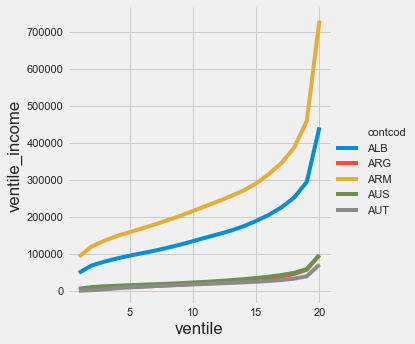

In [28]:
sns.relplot(x="ventile", y="ventile_income", kind="line", hue="contcod", legend="full", data=df[:100]);

*WARNING* -- `ventile_income` is expressed in the country's currency rather than PPP, we'll need to convert

So we go out and find the PPP conversion factor data -- another dataset!

*NOTE:* `./data/API_PA.NUS.PPP_DS2_en_csv_v2_10578402.csv` was renamed and cleaned as `./ppp.csv`

In [30]:
ppp = pd.read_csv('DATA/ppp.csv')

In [31]:
ppp.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,1.247673,1.260119,1.246163,1.197089,1.195737,1.207233,1.176832,1.162809,NaN,NaN
1,Afghanistan,AFG,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,15.197030,17.356170,18.273028,18.823950,18.579175,18.832529,19.579392,19.588412,NaN,NaN
2,Angola,AGO,"PPP conversion factor, GDP (LCU per internatio...",PA.NUS.PPP,NaN,NaN,NaN,NaN,NaN,NaN,...,52.926370,68.314856,71.892794,72.659247,73.849371,70.497210,84.918868,102.180626,NaN,NaN


In [32]:
ppp = ppp[['Country Code', '2011']]

In [33]:
ppp.head(3)

,Country Code,2011
0,ABW,1.260119
1,AFG,17.356170
2,AGO,68.314856


Rename columns for ease or reference

In [34]:
ppp.columns = ['code', '2011']

In [35]:
ppp.head(3)

,code,2011
0,ABW,1.260119
1,AFG,17.356170
2,AGO,68.314856


### China

The data from China is split into _urban_ and _rural_ areas; we'll add the two lookup values using the PPP conversion for the whole country.

In [36]:
ppp[ppp['code'] == 'CHN']

,code,2011
38,CHN,3.505536


In [37]:
china_conversion = ppp[ppp['code'] == 'CHN']['2011'].get(38)

In [38]:
china_conversion

3.50553600718135

In [39]:
ppp.tail(4)

,code,2011
260,YEM,75.818135
261,ZAF,4.773938
262,ZMB,2.378380
263,ZWE,0.504427


In [40]:
ppp = ppp.append({'code': 'CHN-R', '2011': china_conversion}, ignore_index=True)

In [41]:
ppp = ppp.append({'code': 'CHN-U', '2011': china_conversion}, ignore_index=True)

In [42]:
ppp.tail(4)

,code,2011
262,ZMB,2.378380
263,ZWE,0.504427
264,CHN-R,3.505536
265,CHN-U,3.505536


Now we are ready to work!

Let's create a function that returns the conversion factor!

In [43]:
def conversion_factor(code):
  # find row with exact code match, select 2011 column, grab first value (the only one there is)
  return ppp.loc[ppp['code'] == code]['2011'].iloc[0]

In [44]:
conversion_factor('IND')

15.1094346163569

In [45]:
conversion_factor('ABW')

1.26011914250927

In [46]:
conversion_factor('CHN-R')

3.50553600718135

Let's add the conversion factor into our dataframe

In [47]:
df['ppp_factor'] = df.apply(lambda x: conversion_factor(x['contcod']), axis=1)

In [48]:
df.head(3)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor
0,ALB,2012,1,2.829337,1.0,48940.0,0.141467,0.05,43.857745
1,ALB,2012,1,2.829337,2.0,68642.0,0.141467,0.05,43.857745
2,ALB,2012,1,2.829337,3.0,78991.0,0.141467,0.05,43.857745


In [49]:
df.tail(3)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor
2197,ZAF,2010,1,50.586761,18.0,37804.0,2.529338,0.05,4.773938
2198,ZAF,2010,1,50.586761,19.0,59396.0,2.529338,0.05,4.773938
2199,ZAF,2010,1,50.586761,20.0,123150.0,2.529338,0.05,4.773938


Now we just have to create a new column (let's call it `ppp_2005`) multiplying the `Dinc` by `ppp_factor`

In [50]:
df['ppp_2011'] = df.apply(lambda x: x['ventile_income'] / x['ppp_factor'], axis=1)

In [51]:
df.tail(3)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011
2197,ZAF,2010,1,50.586761,18.0,37804.0,2.529338,0.05,4.773938,7918.828875
2198,ZAF,2010,1,50.586761,19.0,59396.0,2.529338,0.05,4.773938,12441.719390
2199,ZAF,2010,1,50.586761,20.0,123150.0,2.529338,0.05,4.773938,25796.311922


Now let's convert `ppp_2005` to `ppp_percentile`

In [52]:
df['ppp_percentile'] = df.apply(lambda x: get_percentile(x['ppp_2011']), axis=1)

Let's graph again to see what we have:

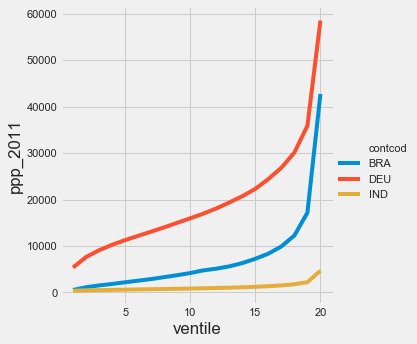

In [53]:
sns.relplot(
  x="ventile", y="ppp_2011", 
  kind="line", hue="contcod", 
#   legend="full", 
  data=df.loc[df['contcod'].isin(['IND', 'DEU', 'BRA'])]
)

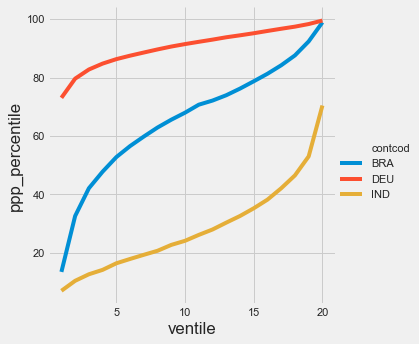

In [54]:
sns.relplot(
  x="ventile", y="ppp_percentile", 
  kind="line", hue="contcod", legend="full", 
  data=df.loc[df['contcod'].isin(['IND', 'DEU', 'BRA'])]
)

In [55]:
df.head(3)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011,ppp_percentile
0,ALB,2012,1,2.829337,1.0,48940.0,0.141467,0.05,43.857745,1115.880438,32.603788
1,ALB,2012,1,2.829337,2.0,68642.0,0.141467,0.05,43.857745,1565.105538,42.932962
2,ALB,2012,1,2.829337,3.0,78991.0,0.141467,0.05,43.857745,1801.072981,47.121037


In [56]:
def get_x_coordinate(ventile):
    return (ventile * 5 - 2.5)

In [57]:
df['x'] = df.apply(lambda x: get_x_coordinate(x['ventile']), axis=1)

In [58]:
df.head(5)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011,ppp_percentile,x
0,ALB,2012,1,2.829337,1.0,48940.0,0.141467,0.05,43.857745,1115.880438,32.603788,2.5
1,ALB,2012,1,2.829337,2.0,68642.0,0.141467,0.05,43.857745,1565.105538,42.932962,7.5
2,ALB,2012,1,2.829337,3.0,78991.0,0.141467,0.05,43.857745,1801.072981,47.121037,12.5
3,ALB,2012,1,2.829337,4.0,87698.0,0.141467,0.05,43.857745,1999.601199,50.162916,17.5
4,ALB,2012,1,2.829337,5.0,95185.0,0.141467,0.05,43.857745,2170.312209,52.479402,22.5


***

=== ONLY GRAPHING BELOW ===

***

# Make it PRETTY!

In [59]:
several = df.loc[df['contcod'].isin(['DEU', 'BRA', 'IND'])]

In [60]:
several['ppp_percentile'].max()

99.5354804871905

In [61]:
several.head(3)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011,ppp_percentile,x
200,BRA,2012,1,196.935135,1.0,790.0,9.846757,0.05,1.471075,537.022299,13.458496,2.5
201,BRA,2012,1,196.935135,2.0,1657.0,9.846757,0.05,1.471075,1126.387278,32.603788,7.5
202,BRA,2012,1,196.935135,3.0,2235.0,9.846757,0.05,1.471075,1519.297263,42.102563,12.5


In [62]:
several.tail(3)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011,ppp_percentile,x
837,IND,2011,0,1221.156372,18.0,26727.0,61.057819,0.05,15.109435,1768.894779,46.512653,87.5
838,IND,2011,0,1221.156372,19.0,33582.0,61.057819,0.05,15.109435,2222.584819,53.027131,92.5
839,IND,2011,0,1221.156372,20.0,70873.0,61.057819,0.05,15.109435,4690.645401,70.441166,97.5


US Poverty guidelines:

https://aspe.hhs.gov/prior-hhs-poverty-guidelines-and-federal-register-references



2005:  `$9,570`

2011:  `$10,890`

2013:  `$11,490`


In [63]:
get_percentile(10890)

85.76530437315608

In [64]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255]]
#           , [0,158/255,115/255]]
#           [213/255,94/255,0], [0,114/255,178/255]]

# CUSTOM TICKS

Custom ticks are important as percentiles obscure the income, and plotting equally spaced income values is cognitively taxing when interpreting the graph.

By computing evenly spaced incomes in `global_income_distribution.ipynb` using `get_ppp_from_percentile` we get this:

```
[0, 310, 470, 610, 730, 890, 1050, 1230, 1430, 1690, 2010, 2410, 2950, 3650, 4630, 5950, 7790, 10410, 14450, 2195]
```

Which is not satisfactory -- try skimming the graph without having to read each value.

So we choose a sparse set of 'round' numbers:

```
$365 = $1/day, 

$690 = $1.90/day
```

In [65]:
values_to_plot = [365, 693.5, 1000, 1500, 2000, 3000, 5000, 10000, 15000, 20000, 30000]

Pretty versions for tick labels:

In [66]:
values_to_plot_pretty = ['$' + '{:,}'.format(x) for x in values_to_plot]

Manually update some entries

In [67]:
values_to_plot_pretty[0] = '$1/day'

In [68]:
values_to_plot_pretty[1] = '$1.9/day'

In [69]:
values_to_plot_pretty

['$1/day',
 '$1.9/day',
 '$1,000',
 '$1,500',
 '$2,000',
 '$3,000',
 '$5,000',
 '$10,000',
 '$15,000',
 '$20,000',
 '$30,000']

In [70]:
associated_percentiles = []
for value in values_to_plot:
  associated_percentiles.append(get_percentile(value))

In [71]:
associated_percentiles

[6.9907312828598895,
 19.3171677020114,
 29.1832129048416,
 41.6892502775125,
 50.162915510172006,
 60.664687762846896,
 71.699741915554,
 84.3856327945172,
 90.6337912439263,
 94.14895073810129,
 97.4310088548694]

These percentiles are what we'll use to place tick locations!

And we'll need a dictionary to convert between them.

In [72]:
pretty_ticks_dict = dict(zip(associated_percentiles, values_to_plot_pretty)) 

In [73]:
pretty_ticks_dict

{6.9907312828598895: '$1/day',
 19.3171677020114: '$1.9/day',
 29.1832129048416: '$1,000',
 41.6892502775125: '$1,500',
 50.162915510172006: '$2,000',
 60.664687762846896: '$3,000',
 71.699741915554: '$5,000',
 84.3856327945172: '$10,000',
 90.6337912439263: '$15,000',
 94.14895073810129: '$20,000',
 97.4310088548694: '$30,000'}

***

# FIGURE 4

In [74]:
several.head(5)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011,ppp_percentile,x
200,BRA,2012,1,196.935135,1.0,790.0,9.846757,0.05,1.471075,537.022299,13.458496,2.5
201,BRA,2012,1,196.935135,2.0,1657.0,9.846757,0.05,1.471075,1126.387278,32.603788,7.5
202,BRA,2012,1,196.935135,3.0,2235.0,9.846757,0.05,1.471075,1519.297263,42.102563,12.5
203,BRA,2012,1,196.935135,4.0,2699.0,9.846757,0.05,1.471075,1834.712892,47.788790,17.5
204,BRA,2012,1,196.935135,5.0,3229.0,9.846757,0.05,1.471075,2194.993675,52.779714,22.5


In [75]:
several['ventile'] = several['ventile'] * 5 - 2.5

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
several.head(5)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011,ppp_percentile,x
200,BRA,2012,1,196.935135,2.5,790.0,9.846757,0.05,1.471075,537.022299,13.458496,2.5
201,BRA,2012,1,196.935135,7.5,1657.0,9.846757,0.05,1.471075,1126.387278,32.603788,7.5
202,BRA,2012,1,196.935135,12.5,2235.0,9.846757,0.05,1.471075,1519.297263,42.102563,12.5
203,BRA,2012,1,196.935135,17.5,2699.0,9.846757,0.05,1.471075,1834.712892,47.788790,17.5
204,BRA,2012,1,196.935135,22.5,3229.0,9.846757,0.05,1.471075,2194.993675,52.779714,22.5


Text(80, 3460, 'India')

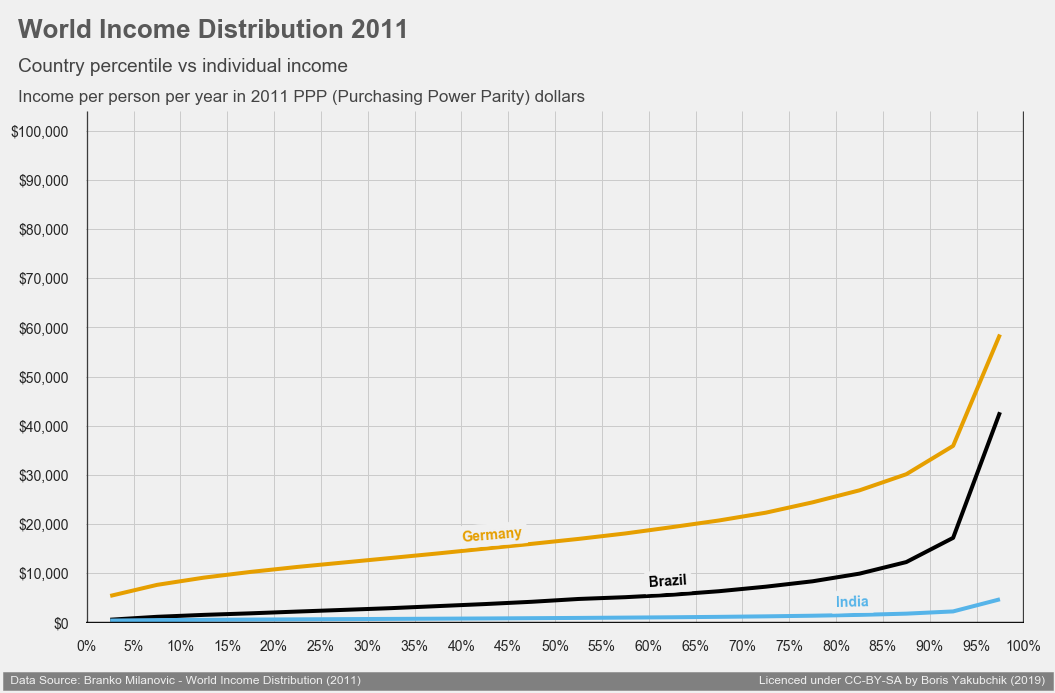

In [77]:
chart = sns.relplot(
  x="ventile", 
  y="ppp_2011", 
  kind="line", 
  hue="contcod",
  data=several,
  palette=colors,
  legend=False,
  height=8,
  aspect=16/9
)


# ------------------ CLEAR LABELS -----------------------------------

chart.axes[0][0].set_title("", fontsize=30)
chart.axes[0][0].set_xlabel("",fontsize=16)
chart.axes[0][0].set_ylabel("",fontsize=16)

# ------------------ SET TICKS --------------------------------------

chart.axes[0][0].yaxis.set_major_locator(ticker.FixedLocator([10000*n for n in range(0, 11)]))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['$' + '{:,.0f}'.format(10000*n) for n in range(0, 11)]
chart.set_yticklabels(ylabels)

# ------------------ SET TITLE --------------------------------------

# empty character placed above the title to give title more space above
chart.axes[0][0].text(
  x = 0, 
  y = 123000, 
  s = " ")

chart.axes[0][0].text(
  x = -7.3, 
  y = 119000, 
  s = "World Income Distribution 2011",
  fontsize = 26, weight = 'bold', alpha = .75)

chart.axes[0][0].text(
  x = -7.3, 
  y = 112000,
  s = 'Country percentile vs individual income',
  fontsize = 19, alpha = .85)

chart.axes[0][0].text(
  x = -7.3, 
  y = 106000,
  s = 'Income per person per year in 2011 PPP (Purchasing Power Parity) dollars',
  fontsize = 17, alpha = .85)

# ------------------ DRAW BLACK BOX --------------------------------------

chart.axes[0][0].axhline(y = 0,     color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on bottom
chart.axes[0][0].axhline(y = 100,   color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on top

chart.axes[0][0].axvline(x = 0,     color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on left
chart.axes[0][0].axvline(x = 100,   color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on right

# ------------------ HORIZONTALS --------------------------------------

# # USD poverty threshold 2013 - horizontal
# chart.axes[0][0].axhline(y = 83.66, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 85.76, 
#   s = "$10,890 - Individual US Poverty Line 2011",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# chart.axes[0][0].axhline(y = 50, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 51.34, 
#   s = "$2000 - World Median Income (estimate)",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# ------------------ LIMITS --------------------------------------

chart.axes[0][0].tick_params(labelsize=14)

# chart.axes[0][0].set_ylim(-0.4, 100.1)
# chart.axes[0][0].set_xlim(-0.2, 100.1)
chart.axes[0][0].set_ylim(-400,104000)
chart.axes[0][0].set_xlim(-0.3, 100.1)

# ------------------ SIGNATURE -----------------------------------
chart.axes[0][0].text(
    x = -8.5, 
    y = -12500,
    s = ' Data Source: Branko Milanovic - World Income Distribution (2011)                                                                                                                      Licenced under CC-BY-SA by Boris Yakubchik (2019) ',
    fontsize = 12, 
    color = '#f0f0f0', 
    backgroundcolor = 'grey')

# ------------------ PAD AXIS --------------------------------------

chart.axes[0][0].tick_params(axis='x', which='major', pad=15)
chart.axes[0][0].tick_params(axis='y', which='major', pad=15)

# ------------------ COUNTRY LABELS --------------------------------------

chart.axes[0][0].text(x = 40, y = 17550, s = 'Germany', color = colors[1], weight = 'bold', rotation = 4.9,
               backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 60, y = 7750, s = 'Brazil', color = colors[0], weight = 'bold', rotation = 3.9,
              backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 80, y = 3460, s = 'India', color = colors[2], weight = 'bold', rotation = 1.4,
              backgroundcolor = '#f0f0f0')


For comparison:

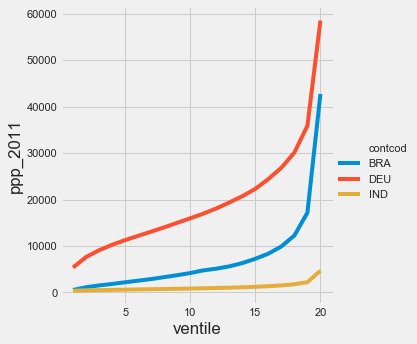

In [78]:
sns.relplot(
  x="ventile", y="ppp_2011", 
  kind="line", hue="contcod", 
#   legend="full", 
  data=df.loc[df['contcod'].isin(['IND', 'DEU', 'BRA'])]
)

***

# FIGURE 5

Text(50, 28.5, 'India')

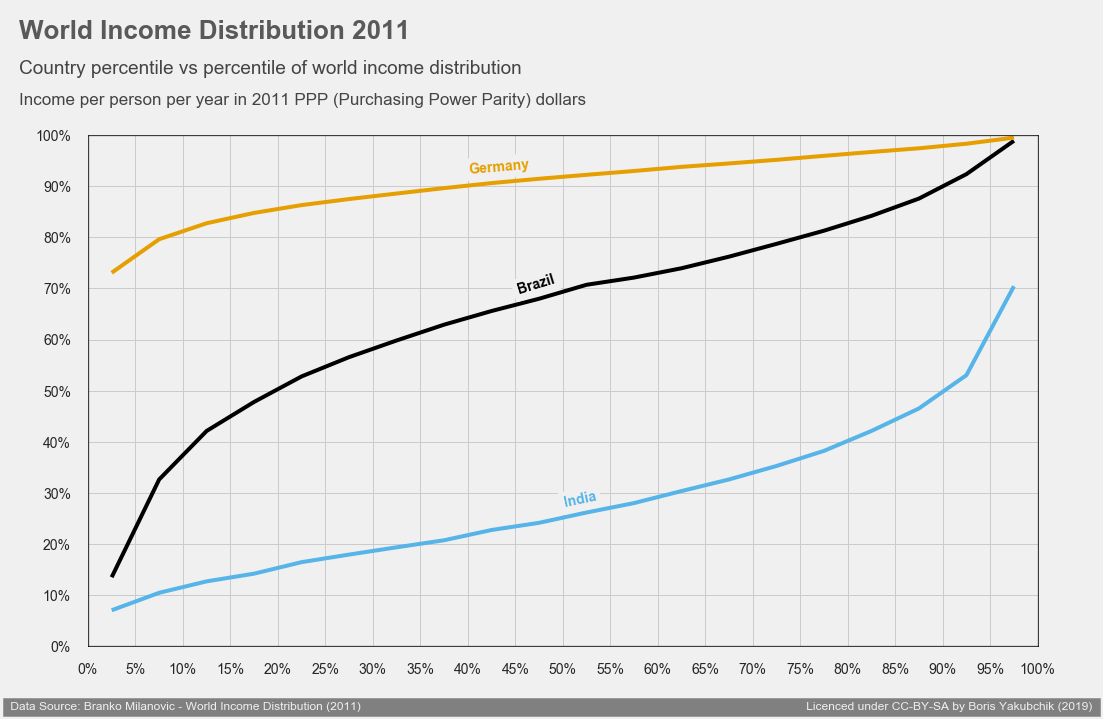

In [79]:
chart = sns.relplot(
  x="x", 
  y="ppp_percentile",
  kind="line", 
  hue="contcod",
  data=several,
  palette=colors,
  legend=False,
  height=8,
  aspect=16/9
)

# ------------------ CLEAR LABELS -----------------------------------

chart.axes[0][0].set_title("", fontsize=30)
chart.axes[0][0].set_xlabel("",fontsize=16)
chart.axes[0][0].set_ylabel("",fontsize=16)

# ------------------ SET TICKS --------------------------------------

chart.axes[0][0].yaxis.set_major_locator(ticker.FixedLocator([10*n for n in range(0, 11)]))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = [str(10* n) + '%' for n in range(0, 11)]
chart.set_yticklabels(ylabels)

# ------------------ SET TITLE --------------------------------------

# empty character placed above the title to give title more space above
chart.axes[0][0].text(
  x = 0, 
  y = 123, 
  s = " ")

chart.axes[0][0].text(
  x = -7.3, 
  y = 119, 
  s = "World Income Distribution 2011",
  fontsize = 26, weight = 'bold', alpha = .75)

chart.axes[0][0].text(
  x = -7.3, 
  y = 112,
  s = 'Country percentile vs percentile of world income distribution',
  fontsize = 19, alpha = .85)

chart.axes[0][0].text(
  x = -7.3, 
  y = 106,
  s = 'Income per person per year in 2011 PPP (Purchasing Power Parity) dollars',
  fontsize = 17, alpha = .85)

# ------------------ DRAW BLACK BOX --------------------------------------

chart.axes[0][0].axhline(y = 0,     color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on bottom
chart.axes[0][0].axhline(y = 100,   color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on top

chart.axes[0][0].axvline(x = 0,     color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on left
chart.axes[0][0].axvline(x = 100,   color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on right

# ------------------ HORIZONTALS --------------------------------------

# # USD poverty threshold 2013 - horizontal
# chart.axes[0][0].axhline(y = 83.66, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 85.76, 
#   s = "$10,890 - Individual US Poverty Line 2011",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# chart.axes[0][0].axhline(y = 50, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 51.34, 
#   s = "$2000 - World Median Income (estimate)",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# ------------------ LIMITS --------------------------------------

chart.axes[0][0].tick_params(labelsize=14)

chart.axes[0][0].set_ylim(-0.4, 100.1)
chart.axes[0][0].set_xlim(-0.2, 100.1)

# ------------------ SIGNATURE -----------------------------------
chart.axes[0][0].text(
    x = -8.5, 
    y = -12.5,
    s = ' Data Source: Branko Milanovic - World Income Distribution (2011)                                                                                                                                    Licenced under CC-BY-SA by Boris Yakubchik (2019) ',
    fontsize = 12, 
    color = '#f0f0f0', 
    backgroundcolor = 'grey')

# ------------------ PAD AXIS --------------------------------------

chart.axes[0][0].tick_params(axis='x', which='major', pad=15)
chart.axes[0][0].tick_params(axis='y', which='major', pad=15)

# ------------------ COUNTRY LABELS --------------------------------------

chart.axes[0][0].text(x = 40, y = 93.5, s = 'Germany', color = colors[1], weight = 'bold', rotation = 5,
               backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 45, y = 71, s = 'Brazil', color = colors[0], weight = 'bold', rotation = 17,
              backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 50, y = 28.5, s = 'India', color = colors[2], weight = 'bold', rotation = 12,
              backgroundcolor = '#f0f0f0')

# # ------------------ RIGHT AXIS TICK LABELS --------------------------------------
# chart.axes[0][0].text(x = 105, y = 104.5, s = 'World Percentile', horizontalalignment='right')

# for perc in [x * 10 for x in range(0, 11)]:
#   chart.axes[0][0].text(x = 105, y = perc-0.9, s = str(perc) + '%', horizontalalignment='right')

***

# FIGURE 6

from `global_income_ditstribution.ipynb`

In [80]:
every_10th_percentile = [
"$0",
"$470",
"$730",
"$1,050",
"$1,430",
"$2,010",
"$2,950",
"$4,630",
"$7,790",
"$14,450",
]

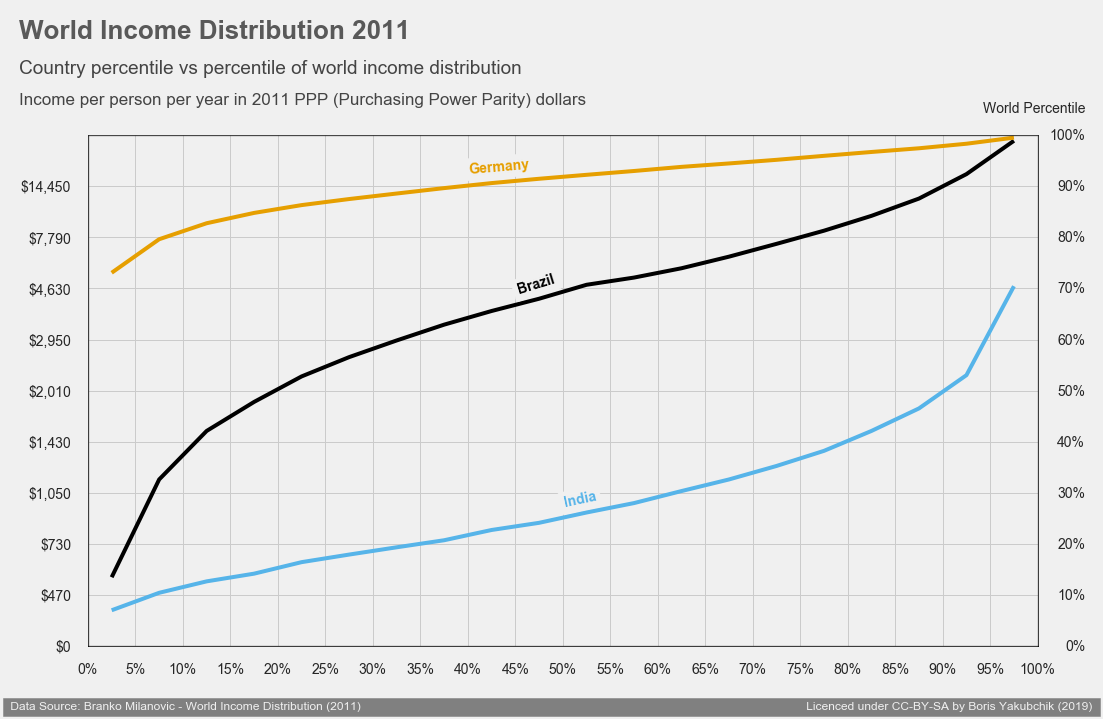

In [81]:
chart = sns.relplot(
  x="x", 
  y="ppp_percentile",
  kind="line", 
  hue="contcod",
  data=several,
  palette=colors,
  legend=False,
  height=8,
  aspect=16/9
)

# ------------------ CLEAR LABELS -----------------------------------

chart.axes[0][0].set_title("", fontsize=30)
chart.axes[0][0].set_xlabel("",fontsize=16)
chart.axes[0][0].set_ylabel("",fontsize=16)

# ------------------ SET TICKS --------------------------------------

chart.axes[0][0].yaxis.set_major_locator(ticker.FixedLocator([10*n for n in range(0, 10)]))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = every_10th_percentile
chart.set_yticklabels(ylabels)

# ------------------ SET TITLE --------------------------------------

# empty character placed above the title to give title more space above
chart.axes[0][0].text(
  x = 0, 
  y = 123, 
  s = " ")

chart.axes[0][0].text(
  x = -7.3, 
  y = 119, 
  s = "World Income Distribution 2011",
  fontsize = 26, weight = 'bold', alpha = .75)

chart.axes[0][0].text(
  x = -7.3, 
  y = 112,
  s = 'Country percentile vs percentile of world income distribution',
  fontsize = 19, alpha = .85)

chart.axes[0][0].text(
  x = -7.3, 
  y = 106,
  s = 'Income per person per year in 2011 PPP (Purchasing Power Parity) dollars',
  fontsize = 17, alpha = .85)

# ------------------ DRAW BLACK BOX --------------------------------------

chart.axes[0][0].axhline(y = 0,     color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on bottom
chart.axes[0][0].axhline(y = 100,   color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on top

chart.axes[0][0].axvline(x = 0,     color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on left
chart.axes[0][0].axvline(x = 100,   color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on right

# ------------------ HORIZONTALS --------------------------------------

# # USD poverty threshold 2013 - horizontal
# chart.axes[0][0].axhline(y = 83.66, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 85.76, 
#   s = "$10,890 - Individual US Poverty Line 2011",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# chart.axes[0][0].axhline(y = 50, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 51.34, 
#   s = "$2000 - World Median Income (estimate)",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# ------------------ LIMITS --------------------------------------

chart.axes[0][0].tick_params(labelsize=14)

chart.axes[0][0].set_ylim(-0.4, 100.1)
chart.axes[0][0].set_xlim(-0.2, 100.1)

# ------------------ SIGNATURE -----------------------------------
chart.axes[0][0].text(
    x = -8.5, 
    y = -12.5,
    s = ' Data Source: Branko Milanovic - World Income Distribution (2011)                                                                                                                                    Licenced under CC-BY-SA by Boris Yakubchik (2019) ',
    fontsize = 12, 
    color = '#f0f0f0', 
    backgroundcolor = 'grey')

# ------------------ PAD AXIS --------------------------------------

chart.axes[0][0].tick_params(axis='x', which='major', pad=15)
chart.axes[0][0].tick_params(axis='y', which='major', pad=15)

# ------------------ COUNTRY LABELS --------------------------------------

chart.axes[0][0].text(x = 40, y = 93.5, s = 'Germany', color = colors[1], weight = 'bold', rotation = 5,
               backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 45, y = 71, s = 'Brazil', color = colors[0], weight = 'bold', rotation = 17,
              backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 50, y = 28.5, s = 'India', color = colors[2], weight = 'bold', rotation = 12,
              backgroundcolor = '#f0f0f0')

# # ------------------ RIGHT AXIS TICK LABELS --------------------------------------
chart.axes[0][0].text(x = 105, y = 104.5, s = 'World Percentile', horizontalalignment='right')

for perc in [x * 10 for x in range(0, 11)]:
  chart.axes[0][0].text(x = 105, y = perc-0.9, s = str(perc) + '%', horizontalalignment='right')

***

# FIGURE 7

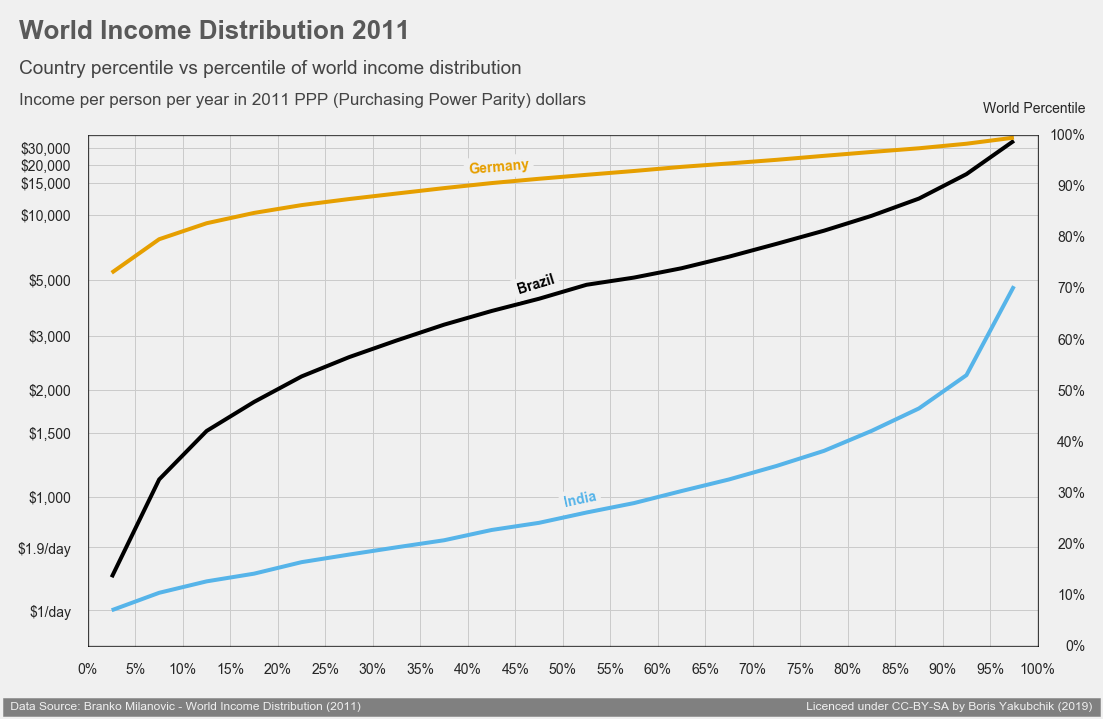

In [82]:
chart = sns.relplot(
  x="x", 
  y="ppp_percentile",
  kind="line", 
  hue="contcod",
  data=several,
  palette=colors,
  legend=False,
  height=8,
  aspect=16/9
)

# ------------------ CLEAR LABELS -----------------------------------

chart.axes[0][0].set_title("", fontsize=30)
chart.axes[0][0].set_xlabel("",fontsize=16)
chart.axes[0][0].set_ylabel("",fontsize=16)

# ------------------ SET TICKS --------------------------------------

chart.axes[0][0].yaxis.set_major_locator(ticker.FixedLocator(associated_percentiles))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = [pretty_ticks_dict.get(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

# ------------------ SET TITLE --------------------------------------

# empty character placed above the title to give title more space above
chart.axes[0][0].text(
  x = 0, 
  y = 123, 
  s = " ")

chart.axes[0][0].text(
  x = -7.3, 
  y = 119, 
  s = "World Income Distribution 2011",
  fontsize = 26, weight = 'bold', alpha = .75)

chart.axes[0][0].text(
  x = -7.3, 
  y = 112,
  s = 'Country percentile vs percentile of world income distribution',
  fontsize = 19, alpha = .85)

chart.axes[0][0].text(
  x = -7.3, 
  y = 106,
  s = 'Income per person per year in 2011 PPP (Purchasing Power Parity) dollars',
  fontsize = 17, alpha = .85)

# ------------------ DRAW BLACK BOX --------------------------------------

chart.axes[0][0].axhline(y = 0,     color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on bottom
chart.axes[0][0].axhline(y = 100,   color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on top

chart.axes[0][0].axvline(x = 0,     color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on left
chart.axes[0][0].axvline(x = 100,   color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on right

# ------------------ HORIZONTALS --------------------------------------

# # USD poverty threshold 2013 - horizontal
# chart.axes[0][0].axhline(y = 83.66, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 85.76, 
#   s = "$10,890 - Individual US Poverty Line 2011",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# chart.axes[0][0].axhline(y = 50, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 51.34, 
#   s = "$2000 - World Median Income (estimate)",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# ------------------ LIMITS --------------------------------------

chart.axes[0][0].tick_params(labelsize=14)

chart.axes[0][0].set_ylim(-0.4, 100.1)
chart.axes[0][0].set_xlim(-0.2, 100.1)

# ------------------ SIGNATURE -----------------------------------
chart.axes[0][0].text(
    x = -8.5, 
    y = -12.5,
    s = ' Data Source: Branko Milanovic - World Income Distribution (2011)                                                                                                                                    Licenced under CC-BY-SA by Boris Yakubchik (2019) ',
    fontsize = 12, 
    color = '#f0f0f0', 
    backgroundcolor = 'grey')

# ------------------ PAD AXIS --------------------------------------

chart.axes[0][0].tick_params(axis='x', which='major', pad=15)
chart.axes[0][0].tick_params(axis='y', which='major', pad=15)

# ------------------ COUNTRY LABELS --------------------------------------

chart.axes[0][0].text(x = 40, y = 93.5, s = 'Germany', color = colors[1], weight = 'bold', rotation = 5,
               backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 45, y = 71, s = 'Brazil', color = colors[0], weight = 'bold', rotation = 17,
              backgroundcolor = '#f0f0f0')
chart.axes[0][0].text(x = 50, y = 28.5, s = 'India', color = colors[2], weight = 'bold', rotation = 12,
              backgroundcolor = '#f0f0f0')

# ------------------ RIGHT AXIS TICK LABELS --------------------------------------
chart.axes[0][0].text(x = 105, y = 104.5, s = 'World Percentile', horizontalalignment='right')

for perc in [x * 10 for x in range(0, 11)]:
  chart.axes[0][0].text(x = 105, y = perc-0.9, s = str(perc) + '%', horizontalalignment='right')

***

# FIGURE 8

Drop Zimbabwe (ZMB) as something went wrong with the data when converting it using PPP conversion.

In [83]:
df['contcod'].unique().size

105

In [84]:
all_ready = df

In [85]:
all_ready['contcod'].unique().size

105

In [86]:
df.tail(5)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011,ppp_percentile,x
2195,ZAF,2010,1,50.586761,16.0,17955.0,2.529338,0.05,4.773938,3761.045721,65.801831,77.5
2196,ZAF,2010,1,50.586761,17.0,24551.0,2.529338,0.05,4.773938,5142.714202,72.205266,82.5
2197,ZAF,2010,1,50.586761,18.0,37804.0,2.529338,0.05,4.773938,7918.828875,80.333277,87.5
2198,ZAF,2010,1,50.586761,19.0,59396.0,2.529338,0.05,4.773938,12441.719390,87.816468,92.5
2199,ZAF,2010,1,50.586761,20.0,123150.0,2.529338,0.05,4.773938,25796.311922,96.428663,97.5


In [87]:
all_ready.tail(5)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011,ppp_percentile,x
2195,ZAF,2010,1,50.586761,16.0,17955.0,2.529338,0.05,4.773938,3761.045721,65.801831,77.5
2196,ZAF,2010,1,50.586761,17.0,24551.0,2.529338,0.05,4.773938,5142.714202,72.205266,82.5
2197,ZAF,2010,1,50.586761,18.0,37804.0,2.529338,0.05,4.773938,7918.828875,80.333277,87.5
2198,ZAF,2010,1,50.586761,19.0,59396.0,2.529338,0.05,4.773938,12441.719390,87.816468,92.5
2199,ZAF,2010,1,50.586761,20.0,123150.0,2.529338,0.05,4.773938,25796.311922,96.428663,97.5


In [88]:
countries_in_all = all_ready['contcod'].unique().size
countries_in_all

105

In [89]:
sns.set_context(rc = {'lines.linewidth': 0.5})

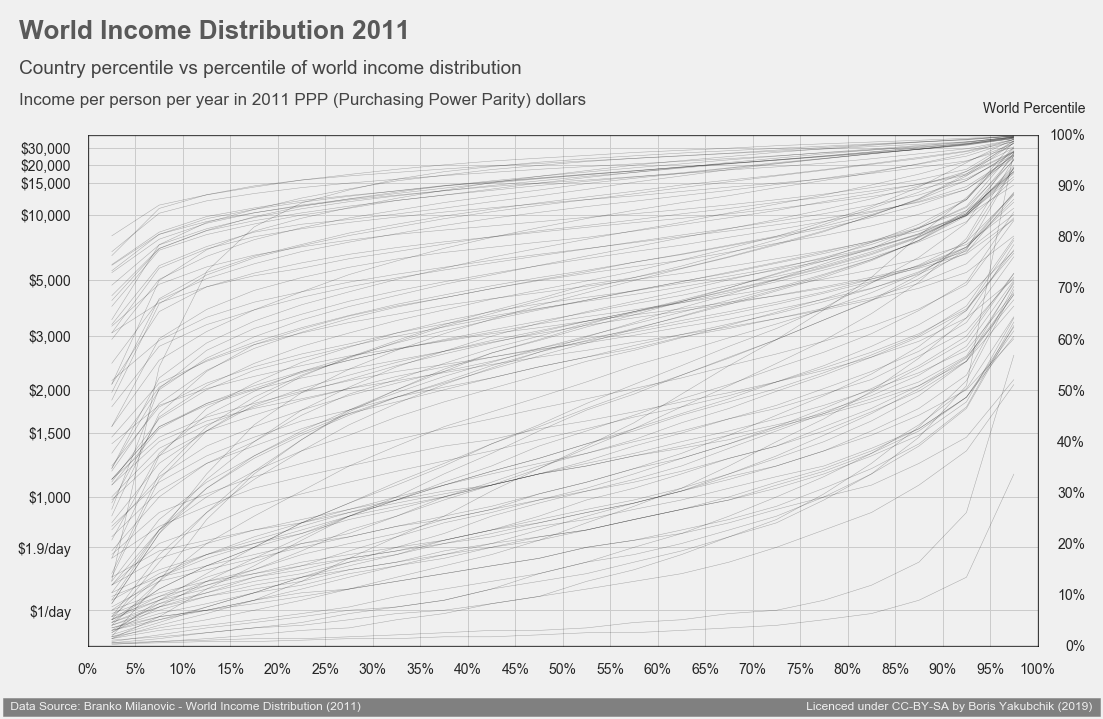

In [90]:
chart = sns.relplot(
  x="x", 
  y="ppp_percentile",
  kind="line", 
  hue="contcod",
  data=all_ready,
  palette=[[0,0,0, 0.3] for n in range(0, countries_in_all)],
  legend=False,
  height=8,
  aspect=16/9
)

# ------------------ CLEAR LABELS -----------------------------------

chart.axes[0][0].set_title("", fontsize=30)
chart.axes[0][0].set_xlabel("",fontsize=16)
chart.axes[0][0].set_ylabel("",fontsize=16)

# ------------------ SET TICKS --------------------------------------

chart.axes[0][0].yaxis.set_major_locator(ticker.FixedLocator(associated_percentiles))
chart.axes[0][0].yaxis.set_major_formatter(ticker.ScalarFormatter())

chart.axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(5))
chart.axes[0][0].xaxis.set_major_formatter(ticker.ScalarFormatter())

ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) + '%' for x in ticks_x]
chart.set_xticklabels(xlabels)

ticks_y = chart.axes[0][0].get_yticks()
ylabels = [pretty_ticks_dict.get(y) for y in ticks_y]
chart.set_yticklabels(ylabels)

# ------------------ SET TITLE --------------------------------------

# empty character placed above the title to give title more space above
chart.axes[0][0].text(
  x = 0, 
  y = 123, 
  s = " ")

chart.axes[0][0].text(
  x = -7.3, 
  y = 119, 
  s = "World Income Distribution 2011",
  fontsize = 26, weight = 'bold', alpha = .75)

chart.axes[0][0].text(
  x = -7.3, 
  y = 112,
  s = 'Country percentile vs percentile of world income distribution',
  fontsize = 19, alpha = .85)

chart.axes[0][0].text(
  x = -7.3, 
  y = 106,
  s = 'Income per person per year in 2011 PPP (Purchasing Power Parity) dollars',
  fontsize = 17, alpha = .85)

# ------------------ DRAW BLACK BOX --------------------------------------

chart.axes[0][0].axhline(y = 0,     color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on bottom
chart.axes[0][0].axhline(y = 100,   color = 'black', linewidth = 1.3, alpha = .7)     # horizonal line on top

chart.axes[0][0].axvline(x = 0,     color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on left
chart.axes[0][0].axvline(x = 100,   color = 'black', linewidth = 1.3, alpha = .7)   # vertical line on right

# ------------------ HORIZONTALS --------------------------------------

# # USD poverty threshold 2013 - horizontal
# chart.axes[0][0].axhline(y = 83.66, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 85.76, 
#   s = "$10,890 - Individual US Poverty Line 2011",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# chart.axes[0][0].axhline(y = 50, linestyle='dashed', color='gray', linewidth = 2, alpha = .3) 
# chart.axes[0][0].text(
#   x = 1, 
#   y = 51.34, 
#   s = "$2000 - World Median Income (estimate)",
#   color = 'gray',
#   fontsize = 14, 
#   alpha = .75)

# ------------------ LIMITS --------------------------------------

chart.axes[0][0].tick_params(labelsize=14)

chart.axes[0][0].set_ylim(-0.4, 100.1)
chart.axes[0][0].set_xlim(-0.2, 100.1)

# ------------------ SIGNATURE -----------------------------------
chart.axes[0][0].text(
    x = -8.5, 
    y = -12.5,
    s = ' Data Source: Branko Milanovic - World Income Distribution (2011)                                                                                                                                    Licenced under CC-BY-SA by Boris Yakubchik (2019) ',
    fontsize = 12, 
    color = '#f0f0f0', 
    backgroundcolor = 'grey')

# ------------------ PAD AXIS --------------------------------------

chart.axes[0][0].tick_params(axis='x', which='major', pad=15)
chart.axes[0][0].tick_params(axis='y', which='major', pad=15)

# ------------------ COUNTRY LABELS --------------------------------------

# chart.axes[0][0].text(x = 40, y = 93.5, s = 'Germany', color = colors[1], weight = 'bold', rotation = 5,
#                backgroundcolor = '#f0f0f0')
# chart.axes[0][0].text(x = 45, y = 71, s = 'Brazil', color = colors[0], weight = 'bold', rotation = 17,
#               backgroundcolor = '#f0f0f0')
# chart.axes[0][0].text(x = 50, y = 28.5, s = 'India', color = colors[2], weight = 'bold', rotation = 12,
#               backgroundcolor = '#f0f0f0')

# ------------------ RIGHT AXIS TICK LABELS --------------------------------------
chart.axes[0][0].text(x = 105, y = 104.5, s = 'World Percentile', horizontalalignment='right')

for perc in [x * 10 for x in range(0, 11)]:
  chart.axes[0][0].text(x = 105, y = perc-0.9, s = str(perc) + '%', horizontalalignment='right')

In [94]:
df.to_csv('WIP/countries_x_y.csv')

***

Austria's data seems weird

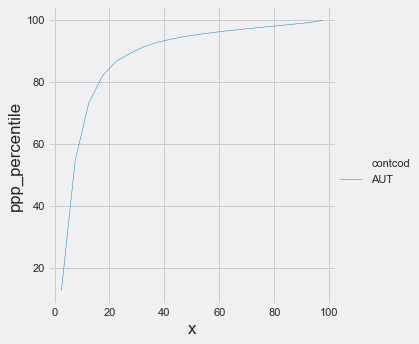

In [92]:
sns.relplot(
  x="x", y="ppp_percentile", 
  kind="line", hue="contcod", 
#   legend="full", 
  data=df.loc[df['contcod'].isin(['AUT'])]
)

In [93]:
df.loc[df['contcod'].isin(['AUT'])].head(4)

,contcod,year_survey,DummyY,totpop,ventile,ventile_income,pop,pop_share,ppp_factor,ppp_2011,ppp_percentile,x
80,AUT,2011,1,8.406187,1.0,437.0,0.420309,0.05,0.831374,525.635875,12.649538,2.5
81,AUT,2011,1,8.406187,2.0,1965.0,0.420309,0.05,0.831374,2363.557196,54.656669,7.5
82,AUT,2011,1,8.406187,3.0,4533.0,0.420309,0.05,0.831374,5452.419729,73.347362,12.5
83,AUT,2011,1,8.406187,4.0,7246.0,0.420309,0.05,0.831374,8715.692336,82.044643,17.5
